<h2 style="color:crimson">Ejercicio 1</h2>

Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.


In [262]:
from requests_html import HTMLSession
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt

In [2]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)

In [3]:
#Consigue el nombre y el link de los último 25 papers en Machine Learning publicados en Arxiv

divpage = r.html.find("div[id='dlpage']", first=True)
papers_links = divpage.find("dt")
papers_titles = divpage.find("dd")
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url # qué es *_
    
    values.append([title, abstract_url])
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))
df_values.head()

,title,url
0,PAPRIKA: Private Online False Discovery Rate C...,https://arxiv.org/abs/2002.12321
1,MetFlow: A New Efficient Method for Bridging t...,https://arxiv.org/abs/2002.12253
2,Semi-supervised Anomaly Detection on Attribute...,https://arxiv.org/abs/2002.12011
3,Fast and Three-rious: Speeding Up Weak Supervi...,https://arxiv.org/abs/2002.11955
4,Max-Affine Spline Insights into Deep Generativ...,https://arxiv.org/abs/2002.11912


In [4]:
abstract = []
submitted = []
for idxabst,url_abs in enumerate(df_values['url']):
    with HTMLSession() as sess:
        r_abs = sess.get(url_abs)
    abstract_res = r_abs.html.find("blockquote[class='abstract mathjax']", first=True).text
    abstract.append(abstract_res)
    sub_date = r_abs.html.find("div[class='dateline']", first=True).text
    sub_date = re.findall("(?<=\(Submitted on ).+(?=\))",sub_date)
    
    submitted.extend(sub_date)


df_values['abstract']= abstract
df_values['submitted']= submitted


In [5]:
df_values = df_values.assign(abstract=df_values.abstract.str.lstrip("Abstract: "))
df_values = df_values.assign(submitted=pd.to_datetime(df_values["submitted"]))
df_values = df_values.assign(abs_idx=df_values.url.str.lstrip("https://arxiv.org/abs/"))
df_values = df_values.set_index('abs_idx')
df_values.head(30)                   

,title,url,abstract,submitted
abs_idx,,,,
2002.12321,PAPRIKA: Private Online False Discovery Rate C...,https://arxiv.org/abs/2002.12321,"In hypothesis testing, a false discovery occur...",2020-02-27
2002.12253,MetFlow: A New Efficient Method for Bridging t...,https://arxiv.org/abs/2002.12253,"In this contribution, we propose a new computa...",2020-02-27
2002.12011,Semi-supervised Anomaly Detection on Attribute...,https://arxiv.org/abs/2002.12011,We propose a simple yet effective method for d...,2020-02-27
2002.11955,Fast and Three-rious: Speeding Up Weak Supervi...,https://arxiv.org/abs/2002.11955,Weak supervision is a popular method for build...,2020-02-27
2002.11912,Max-Affine Spline Insights into Deep Generativ...,https://arxiv.org/abs/2002.11912,We connect a large class of Generative Deep Ne...,2020-02-26
2002.11879,State-only Imitation with Transition Dynamics ...,https://arxiv.org/abs/2002.11879,Imitation Learning (IL) is a popular paradigm ...,2020-02-27
2002.11743,Conditional Sampling from Invertible Generativ...,https://arxiv.org/abs/2002.11743,We consider uncertainty aware compressive sens...,2020-02-26
2002.12334,A Distributional Framework for Data Valuation,https://arxiv.org/abs/2002.12334,Shapley value is a classic notion from game th...,2020-02-27
2002.12326,Estimating the Effects of Continuous-valued In...,https://arxiv.org/abs/2002.12326,While much attention has been given to the pro...,2020-02-27


<h2 style="color:crimson">Ejercicio 2</h2>

Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


In [360]:
import requests
from collections import defaultdict
avkey = 'ZAJOBEA48RT1R86Z'
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"

target_curr = ["MXN","EUR", "BRL", "ARS", "CHF"]


In [372]:
df2 = pd.DataFrame(index=[datetime.datetime.today()- datetime.timedelta(days=x) for x in range(5000)] )
df2.index = df2.index.strftime('%Y-%m-%d')

for idxcurr, curr in enumerate(target_curr):
    target = target_curr[idxcurr]
    intraday = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": target,
        "apikey": avkey,
        "outputsize": "full"
        }
    r = requests.get(base_url, params=intraday)
    data = r.json()
    moneda = data['Meta Data']['2. From Symbol']
    df_data = pd.DataFrame(data['Time Series FX (Daily)']).T
    df_data = df_data[['4. close']]
    df_data.rename(columns={'4. close': moneda}, inplace=True)
    df2 = df2.join(df_data)
      


In [373]:
df2 = df2.fillna(method='bfill')
date_index = pd.to_datetime(df2.index)
df2.index = date_index
df2.head()

,MXN,EUR,BRL,ARS,CHF
2020-03-01,0.0503,1.1045,0.2230,0.0156,1.0369
2020-02-29,0.0510,1.1029,0.2216,0.0156,1.0353
2020-02-28,0.0510,1.1029,0.2230,0.0156,1.0353
2020-02-27,0.0512,1.1002,0.2224,0.0156,1.0323
2020-02-26,0.0518,1.0882,0.2242,0.0157,1.0233


<h2 style="color:crimson">Ejercicio 3</h2>
Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

In [374]:
df2.corr()

""


<p style="color:red;">No sé por qué no me está dando la corr, entonces para el ejercicio rehice la tabla del ejemplo.</p>

In [375]:
df3 = {
   #'date' : [2014-11-24,2014-11-25,2014-11-26,2014-11-27,2014-11-28],
    'MXN' : [0.0732,0.0731,0.0728,0.0726,0.0717],
    'EUR' : [1.2438,1.2473,1.2507,1.2458,1.2451],
    'BRL' : [0.3920,0.3955,0.3995,0.3947,0.3891],
    'ARS' : [0.1169,0.1169,0.1168,0.1169,0.1168],
    'CHF': [1.0342,1.0370,1.0401,1.0363,1.0351]
}

df3 = pd.DataFrame(df3)

df3.head()



,MXN,EUR,BRL,ARS,CHF
0,0.0732,1.2438,0.3920,0.1169,1.0342
1,0.0731,1.2473,0.3955,0.1169,1.0370
2,0.0728,1.2507,0.3995,0.1168,1.0401
3,0.0726,1.2458,0.3947,0.1169,1.0363
4,0.0717,1.2451,0.3891,0.1168,1.0351


In [376]:
df3.corr()

,MXN,EUR,BRL,ARS,CHF
MXN,1.000000,0.136608,0.535858,0.656967,0.154174
EUR,0.136608,1.000000,0.872730,-0.469144,0.994292
BRL,0.535858,0.872730,1.000000,-0.032761,0.901457
ARS,0.656967,-0.469144,-0.032761,1.000000,-0.427517
CHF,0.154174,0.994292,0.901457,-0.427517,1.000000


In [377]:
import seaborn as sn

In [378]:
corrMatrix = df3.corr()

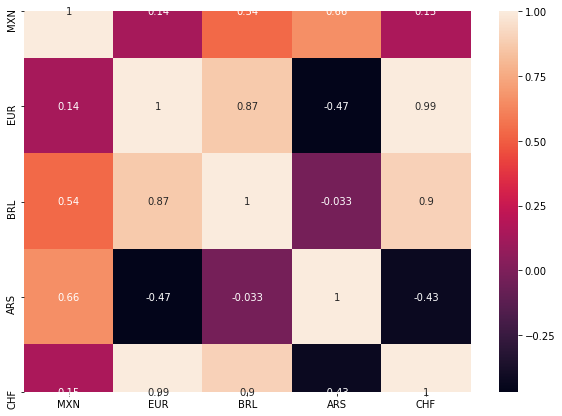

In [379]:
fig, ax = plt.subplots(figsize=(10,7)) 
sn.heatmap(corrMatrix, annot=True,ax=ax)

<h2 style="color:crimson">Ejercicio 4</h2>

Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

In [380]:
corr_mov = df2.rolling(30).corr()

In [381]:
corr_mov = corr_mov[["EUR", "BRL", "ARS", "CHF"]].xs('MXN', level=1)
corr_mov[29:]

,EUR,BRL,ARS,CHF
2020-02-01,-0.432479,0.807239,0.593543,-0.609615
2020-01-31,-0.348670,0.777876,0.526102,-0.513448
2020-01-30,-0.279921,0.704660,0.453463,-0.437630
2020-01-29,-0.190593,0.625458,0.359128,-0.339757
2020-01-28,-0.110268,0.472878,0.227304,-0.253404
...,...,...,...,...
2006-06-28,NaN,NaN,NaN,NaN
2006-06-27,NaN,NaN,NaN,NaN
2006-06-26,NaN,NaN,NaN,NaN
2006-06-25,NaN,NaN,NaN,NaN


<h2 style="color:crimson">Ejercicio 5</h2>

Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)


In [426]:
pos = [['EUR', 'BRL'], ['EUR', 'ARS'], ['BRL', 'ARS'], ['EUR', 'CHF'], ['BRL', 'CHF'], ['ARS', 'CHF']]
len(pos[0])

2

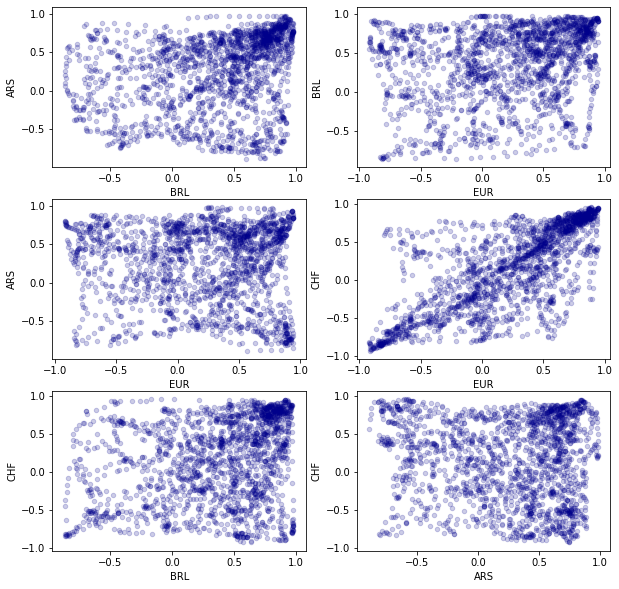

In [451]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10,10))
corr_mov.plot.scatter(x='BRL',y='ARS',c='DarkBlue', alpha=0.2,ax=ax1)
corr_mov.plot.scatter(x='EUR',y='BRL',c='DarkBlue', alpha=0.2,ax=ax2)
corr_mov.plot.scatter(x='EUR',y='ARS',c='DarkBlue', alpha=0.2,ax=ax3)
corr_mov.plot.scatter(x='EUR',y='CHF',c='DarkBlue', alpha=0.2,ax=ax4)
corr_mov.plot.scatter(x='BRL',y='CHF',c='DarkBlue', alpha=0.2,ax=ax5)
corr_mov.plot.scatter(x='ARS',y='CHF',c='DarkBlue', alpha=0.2,ax=ax6)

<h2 style="color:crimson">Ejercicio 6</h2>

Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

In [464]:
corr_mov['med'] = corr_mov[['EUR', 'BRL', 'ARS', 'CHF']].mean(axis = 1)
corr_mov['min'] = corr_mov[['EUR', 'BRL', 'ARS', 'CHF']].min(axis = 1)
corr_mov['max'] = corr_mov[['EUR', 'BRL', 'ARS', 'CHF']].max(axis = 1)
corr_mov
Media = corr_mov['med']
Minimos = corr_mov['min']
maximos = corr_mov['max']

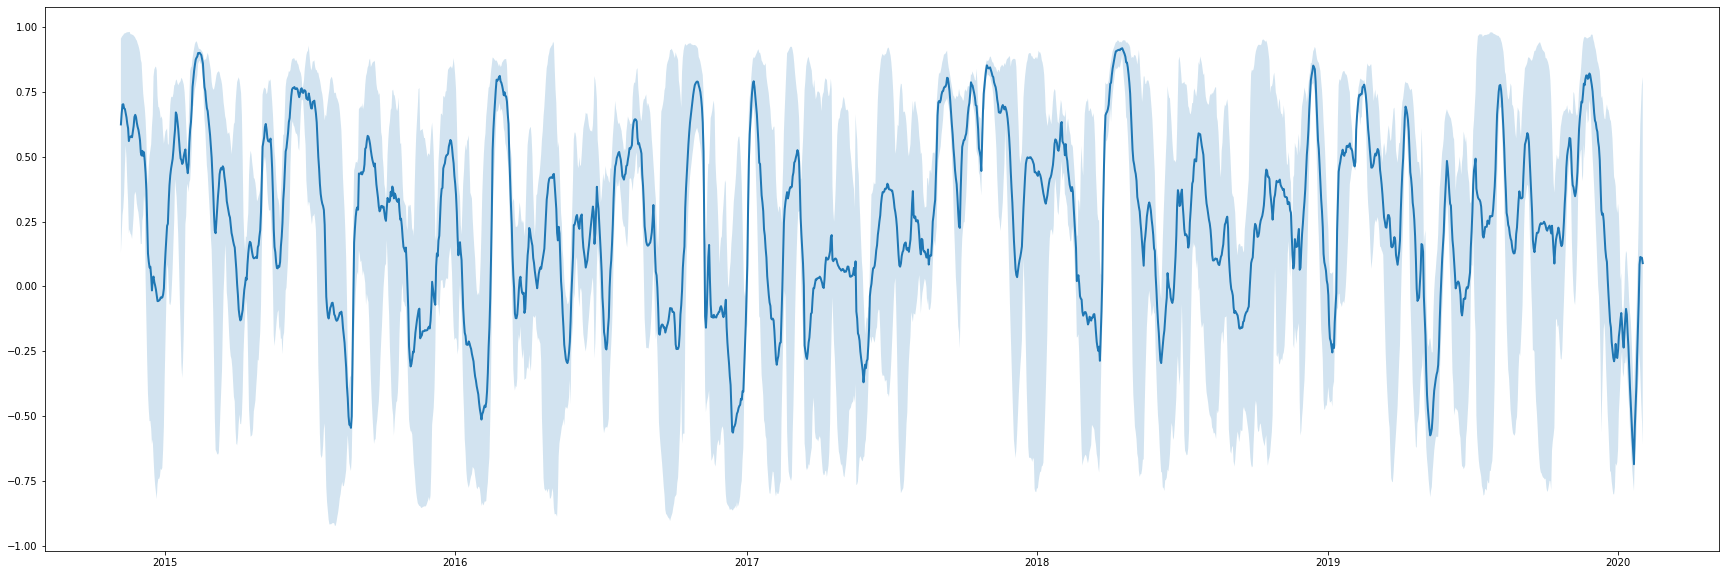

In [468]:
fig, ax = plt.subplots(figsize=(30,10)) 
plt.plot(Media, linewidth=2)
plt.fill_between(corr_mov.index, Minimos, maximos, alpha=.2) 